In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #scores = predictor.inference('text_words_emb_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    #score = predictor.inference(['text_emb_sim'], 
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-134.9-172000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-134.9-172000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-134.9-172000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-134.9-172000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.853850 高:0.407038 动车:0.401262 威马:0.319388 13805194935:0.316505 想飞:0.284399 整洁:0.281430 通票:0.280437 印象:0.275592 未央:0.272898 明火:0.268215 既然:0.266467 占:0.264646 加2:0.262579 毫升:0.261042 授予:0.260579 大亚湾:0.259670 整改:0.258693 跳水:0.258647 乘务:0.257229 座:0.255693 香溪:0.250672 钢轨:0.250297 天禧:0.249499 攻破:0.246489 仙林:0.246478 舱:0.245277 名流:0.244970 达康:0.244449 新城:0.244346 长岛:0.243967 197:0.243647 列车:0.243228 府邸:0.242858 b2:0.242809 young:0.242318 华大:0.242131 面馆:0.242006 玫瑰:0.239794 科勒:0.238831 换钱:0.238000 亩:0.237082 猎人:0.236739 放松:0.236492 处:0.236471 李沧:0.236277 勘查:0.234282 名表:0.234188 官司:0.232766 洪:0.231629 网架:0.230954 永源:0.230944 邮包:0.230815 接送:0.230729 箍筋:0.230684 25000:0.230653 三宝:0.230583 钢丝:0.228271 合页:0.227972 蛳:0.227532 京南:0.227249 寻物:0.226984 brain:0.226226 豪瑞:0.226099 井队:0.225654 蚌:0.225189 i:0.224942 09:0.224913 中数:0.224894 狐狸:0.224523 高斯:0.224483 部门:0.224409 山景:0.223975 堰:0.223952 送您:0.223691 怂:0.223648 中洲:0.223510 开锐:0.223371 文件:0.223060 尾随:0.222822 竿:0.222666 墨:0.222537 烧饭:0.222355

In [9]:
top_words('墨镜')

墨镜:1.000000 黄皮:0.366688 柑:0.345111 气场:0.344371 普茶:0.340169 受潮:0.339792 轻便:0.336583 色斑:0.336297 粉底:0.332809 人手:0.325945 谨记:0.321099 轻盈:0.318492 loho:0.316429 水嫩:0.314841 绞股蓝:0.314344 皮靴:0.314250 脸蛋:0.313890 长腿:0.310126 洁面:0.309926 麽:0.308232 血剑:0.307646 宰:0.300494 伴侣:0.299664 珍惜:0.298384 笑:0.298146 过敏:0.298123 镜片:0.297349 村:0.297281 干枯:0.296966 搭讪:0.295594 镜架:0.294883 失灵:0.294706 东西:0.292302 流汗:0.291630 触控:0.290681 想说:0.287399 纯银:0.284775 富人:0.284556 春光:0.283720 送友:0.283720 渐变:0.283530 求爱:0.283410 小气:0.283086 个子:0.283047 脸部:0.281909 air:0.281551 弥:0.280810 杏花:0.280362 债:0.280328 239:0.280252 副:0.280177 换季:0.280016 必备:0.278930 上身:0.278788 秀发:0.278192 烦人:0.277871 划痕:0.277437 审核:0.276894 送亲:0.276598 飘:0.274754 住所:0.274656 奥秘:0.273986 蓝花:0.273476 辟:0.272686 圆珠:0.272614 轻薄:0.272279 手机:0.271150 大幅:0.271077 单单:0.270653 进水:0.270396 app:0.270293 老化:0.269654 易:0.269260 联创:0.268934 古风:0.268874 茶叶:0.268780 门牙:0.268625 倒霉:0.268505 留神:0.267605 瞅:0.267444 飞轮:0.267245 护发:0.266998 渗漏:0.266624 紫罗兰:0.2664

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.]
[ 0.56085527]
[ 0.53851652]


array([ 0.53851652], dtype=float32)

argmax_encode [[ 0.99999994  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.99999994] 1.0 1
美女


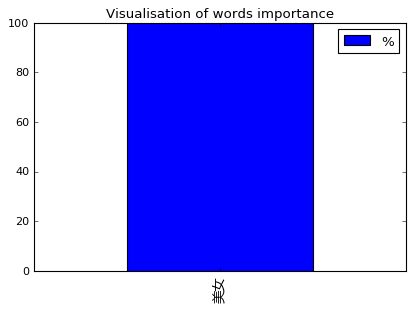

argmax_encode [[ 0.56085539  0.60988545  0.53851628  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.56085539, 0.60988545, 0.53851628] 1.70926 3
帅哥戴墨镜


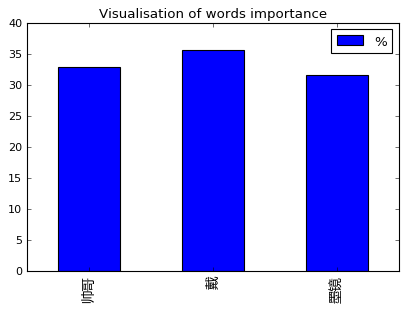

argmax_encode [[ 0.31891233  0.50950241  0.05928132  0.14593422  0.10268816  0.47248137
   0.07876709  0.14582835  0.3166118   0.07876709  0.40108985  0.19070973
   0.07876709  0.16842422  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31891233, 0.50950241, 0.059281323, 0.14593422, 0.10268816, 0.47248137, 0.078767091, 0.14582835, 0.3166118, 0.078767091, 0.40108985, 0.19070973, 0.078767091, 0.16842422] 3.06776 14
初中孩子的免费精品课，用手机，在家上，省心


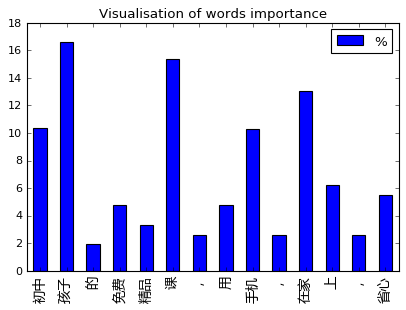

argmax_encode [[ 0.10493164  0.24522862  0.3141503   0.32639951  0.18556237  0.37622401
   0.19493258  0.40260172 -0.01642578  0.23910156  0.17455178  0.16963558
   0.24057321  0.37622401  0.12464474  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10493164, 0.24522862, 0.3141503, 0.32639951, 0.18556237, 0.37622401, 0.19493258, 0.40260172, 0, 0.23910156, 0.17455178, 0.16963558, 0.24057321, 0.37622401, 0.12464474] 3.47476163507 15
好用颜值高才是王道，这些手机现在买才实惠


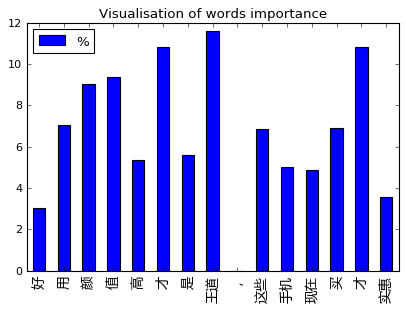

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.12329687  0.46428204  0.41024715  0.35581303  0.07597158  0.21750355
  -0.02907659  0.06384113  0.56907558  0.3823595   0.17993081  0.39136356
   0.19512373 -0.05497861  0.09322958  0.24326691  0.44790405  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12329687, 0.46428204, 0.41024715, 0.35581303, 0.075971581, 0.21750355, 0, 0.063841134, 0.56907558, 0.3823595, 0.17993081, 0.39136356, 0.19512373, 0, 0.093229577, 0.24326691, 0.44790405] 4.21320907027 17
比信用卡分期更划算！有

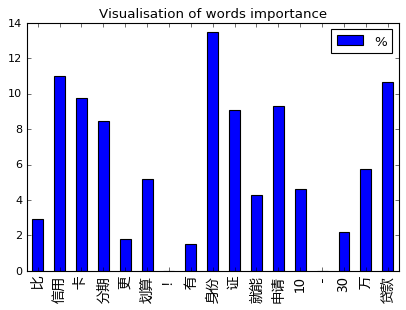

argmax_encode [[ 0.13613653  0.07988428  0.47571734  0.34891063  0.51590371  0.11864892
   0.14650001 -0.00202098  0.21725437 -0.02279549  0.11167453 -0.00285052
   0.1375086   0.04279508  0.06785652  0.09896111 -0.00947688  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13613653, 0.079884276, 0.47571734, 0.34891063, 0.51590371, 0.11864892, 0.14650001, 0, 0.21725437, 0, 0.11167453, 0, 0.1375086, 0.042795084, 0.06785652, 0.098961115, 0] 2.49775163829 17
1890元往返飞旧金山?真是赚了,我一直在这里买!


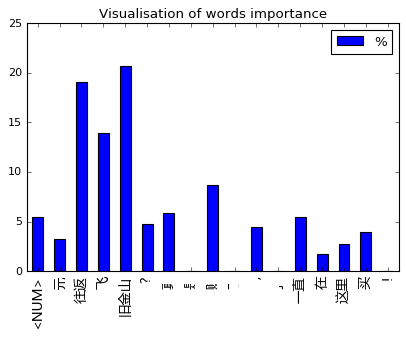

argmax_encode [[ 0.13372992  0.22521634  0.14511685  0.459775    0.4891682   0.24983071
   0.41556263 -0.01257943  0.38080767  0.45808965  0.38751954  0.07466541
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13372992, 0.22521634, 0.14511685, 0.459775, 0.4891682, 0.24983071, 0.41556263, 0, 0.38080767, 0.45808965, 0.38751954, 0.074665412] 3.41948191822 12
这才是上班族修本科的正确打开方式！


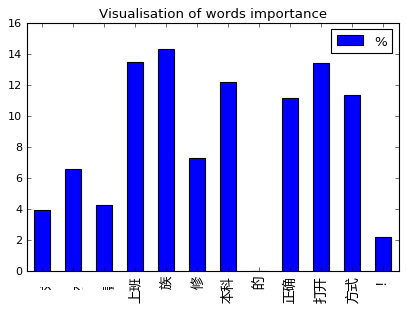

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.04164081  0.0859221   0.07696579  0.01137564 -0.05208984  0.42839006
   0.44132873  0.07004032  0.03996736  0.15599194  0.53578621  0.09192932
   0.13293678  0.40990007  0.29053816  0.37620711  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.041640814, 0.0859221, 0.076965787, 0.011375636, 0, 0.42839006, 0.44132873, 0.070040315, 0.039967358, 0.15599194, 0.53578621, 0.091929317, 0.13293678, 0.40990007, 0.29053816, 0.37620711] 3.18892038986 16
国庆到成都不要住酒店啦

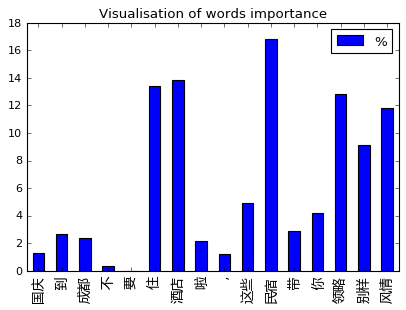

argmax_encode [[ 0.68432218  0.27417046  0.27203965  0.06739424  0.11676872  0.13927698
   0.68432218  0.3300218   0.40367815  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.68432218, 0.27417046, 0.27203965, 0.067394242, 0.11676872, 0.13927698, 0.68432218, 0.3300218, 0.40367815] 2.97199 9
低头玩手机?不如低头学英语


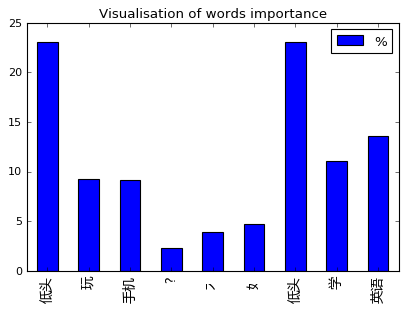

argmax_encode [[ 0.29893848  0.0250383   0.19478694  0.39546251  0.16401669  0.11606173
   0.16270001  0.19723122  0.06159611 -0.00131704  0.09415281  0.14228988
   0.0250383   0.21380997  0.24118389  0.11822804  0.10497271  0.03797211
  -0.03951022  0.2022198   0.32304865  0.16660981 -0.00131704  0.21983671
   0.10175706 -0.00474805  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29893848, 0.0250383, 0.19478694, 0.39546251, 0.16401669, 0.11606173, 0.16270001, 0.19723122, 0.06159611, 0, 0.094152808, 0.14228988, 0.0250383, 0.21380997, 0.24118389, 0.11822804, 0.10

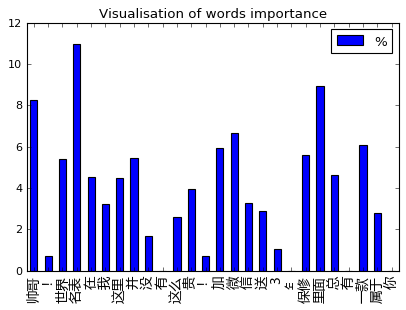

argmax_encode [[ 0.08323941  0.57503223  0.06908803  0.20707199  0.06908803  0.67968827
   0.27634662  0.0866337   0.55606186  0.09438188  0.09679738  0.67516446
   0.14554387  0.18417254  0.0578864   0.67968827 -0.05784658  0.40881181
   0.10957356  0.45766258  0.55606186  0.13546097  0.27552187  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.083239406, 0.57503223, 0.069088034, 0.20707199, 0.069088034, 0.67968827, 0.27634662, 0.086633697, 0.55606186, 0.094381884, 0.096797377, 0.67516446, 0.14554387, 0.18417254, 0.057886403, 0.6796882

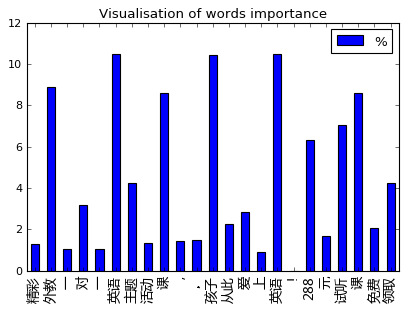

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.29347742  0.17314619  0.3984285   0.13398731  0.20035709  0.0338324
   0.3984285   0.40768909  0.22437005  0.20211789  0.09445594  0.09760158
   0.08394242  0.0239545  -0.00454711  0.01097658  0.09251988  0.05060295
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29347742, 0.17314619, 0.3984285, 0.13398731, 0.20035709, 0.033832397, 0.3984285, 0.40768909, 0.22437005, 0.20211789, 0.094455943, 0.097601578, 0.083942421, 0.023954501, 0, 0.010976585, 0.092519879, 0.05060295] 

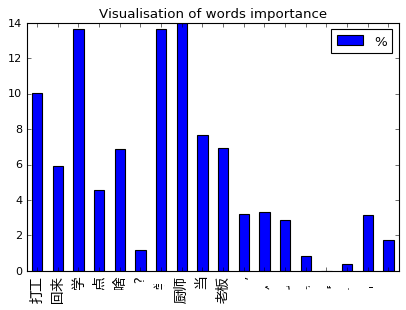

argmax_encode [[ 0.50015575  0.3686285   0.10675566  0.21672873  0.31659791  0.42175096
   0.10675566  0.45046872  0.34644914  0.34201923 -0.01062575  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50015575, 0.3686285, 0.10675566, 0.21672873, 0.31659791, 0.42175096, 0.10675566, 0.45046872, 0.34644914, 0.34201923, 0] 3.17631025612 11
水饺加盟,无需厨师,总部扶持创业!


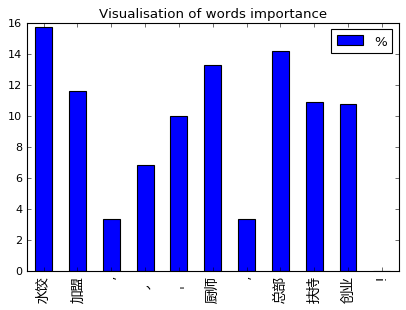

argmax_encode [[ 0.50605416  0.37763339  0.08496907  0.23269534  0.3201952   0.42698097
   0.08496907  0.46289319  0.35699293  0.33803651  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50605416, 0.37763339, 0.084969074, 0.23269534, 0.3201952, 0.42698097, 0.084969074, 0.46289319, 0.35699293, 0.33803651] 3.19142 10
水饺加盟,无需厨师,总部扶持创业


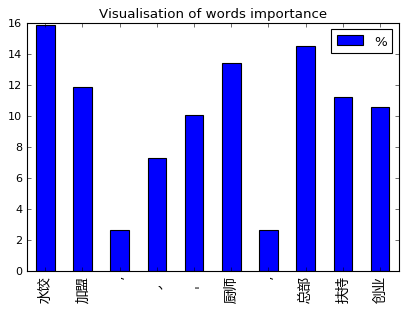

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.33132663  0.42360014  0.31012657  0.19364832  0.09939416  0.31976229
   0.11008734  0.15564118  0.27543098  0.03563317  0.36679327  0.06139512
   0.03379525  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.33132663, 0.42360014, 0.31012657, 0.19364832, 0.099394158, 0.31976229, 0.11008734, 0.15564118, 0.27543098, 0.035633169, 0.36679327, 0.061395124, 0.033795252] 2.71663 13
iPhone隐藏功能：高铁也能在线选座了！


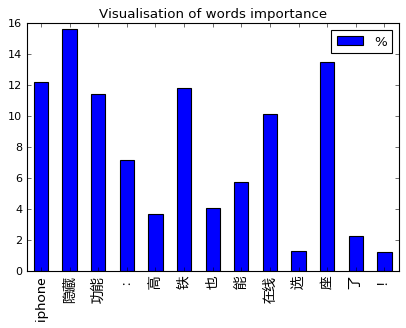

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.3313266]


array([ 0.3313266], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.33699811]


array([ 0.33699811], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.33918625]


array([ 0.33918625], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.48332304]


array([ 0.48332304], dtype=float32)

argmax_encode [[ 0.31056517  0.48442176  0.25349796  0.53188825  0.45952997 -0.00497246
   0.45638418  0.27740967  0.06971554  0.27247337 -0.00497246  0.15242253
   0.41882405  0.23012389  0.06617016  0.53188825  0.244537    0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31056517, 0.48442176, 0.25349796, 0.53188825, 0.45952997, 0, 0.45638418, 0.27740967, 0.069715545, 0.27247337, 0, 0.15242253, 0.41882405, 0.23012389, 0.066170156, 0.53188825, 0.244537] 4.75985173881 17
携手欧歌步入

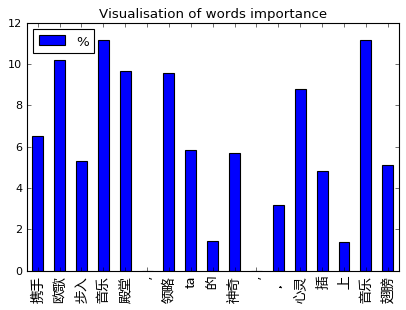

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.52703929  0.62385297  0.16201064  0.40027174  0.38494354  0.31096506
   0.04794355  0.11629441  0.10521152  0.11629441  0.62385297  0.31096506
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52703929, 0.62385297, 0.16201064, 0.40027174, 0.38494354, 0.31096506, 0.047943551, 0.11629441, 0.10521152, 0.11629441, 0.62385297, 0.31096506] 3.72965 12
巨人游泳五星级酒店培训,一对一游泳培训


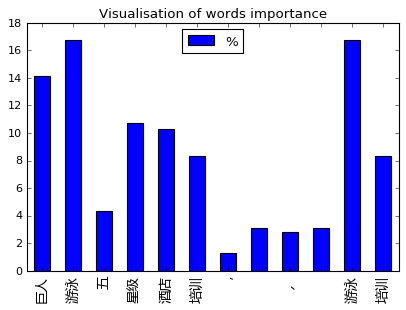

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.49177498  0.37692225  0.49091452  0.12024073  0.19540787  0.0053938
   0.22438005 -0.00286362  0.15275729  0.03945857  0.13985299  0.06598917
   0.09745418  0.10658318  0.00911956  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.49177498, 0.37692225, 0.49091452, 0.12024073, 0.19540787, 0.0053937961, 0.22438005, 0, 0.15275729, 0.039458569, 0.13985299, 0.065989166, 0.097454175, 0.10658318, 0.0091195637] 2.51624911791 15
往返飞旧金山?真是赚了,我一直在这里买!


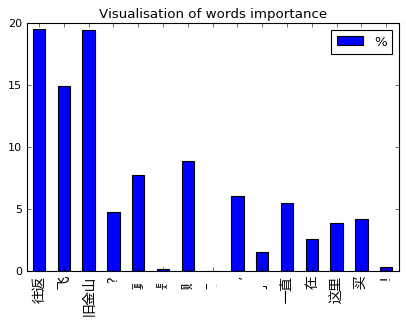

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.05118967  0.03541921  0.57385099  0.53388959  0.06276412  0.17114377
   0.0502278   0.69268417  0.17800826  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.051189672, 0.035419211, 0.57385099, 0.53388959, 0.062764123, 0.17114377, 0.050227802, 0.69268417, 0.17800826] 2.34918 9
不要住酒店，这里的民宿好


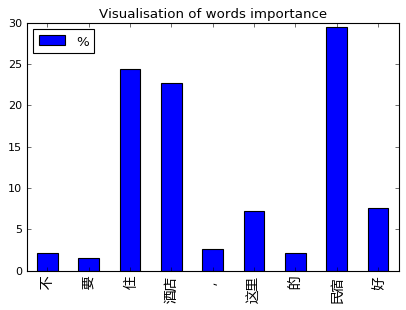

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.05118965  0.0354192   0.57385099  0.69268417  0.06276414  0.1711438
   0.0502278   0.53388965  0.17800826  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.051189646, 0.035419203, 0.57385099, 0.69268417, 0.062764138, 0.1711438, 0.050227802, 0.53388965, 0.17800826] 2.34918 9
不要住民宿，这里的酒店好


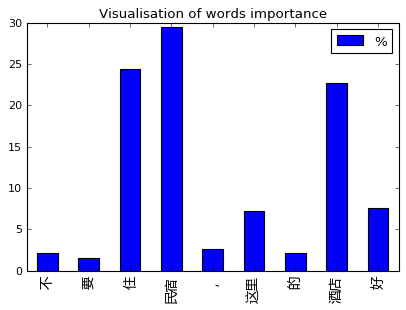

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.21805087  0.25308859  0.29602921  0.18074501  0.45059314 -0.04129295
   0.04504101  0.17622682  0.10815056  0.10506527  0.16590166 -0.04129295
   0.29367089  0.12236334  0.05638739  0.2664775   0.16818941  0.10506527
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.21805087, 0.25308859, 0.29602921, 0.18074501, 0.45059314, 0, 0.045041006, 0.17622682, 0.10815056, 0.10506527, 0.16590166, 0, 0.29367089, 0.12236334, 0.056387395, 0.2664775, 0.16818941, 0.10506527] 3.0110459

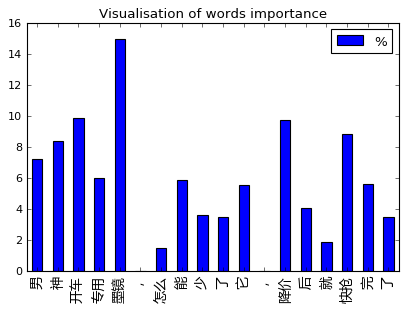

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[ 0.01579408  0.11963361  0.37374344  0.34487173  0.40653503  0.3258037
   0.21729374  0.03271736  0.02624312  0.2103371   0.1958653   0.11963361
   0.29987884  0.2286838   0.25973845  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.015794078, 0.11963361, 0.37374344, 0.34487173, 0.40653503, 0.3258037, 0.21729374, 0.032717358, 0.026243124, 0.2103371, 0.1958653, 0.11963361, 0.29987884, 0.2286838, 0.25973845] 3.17677 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


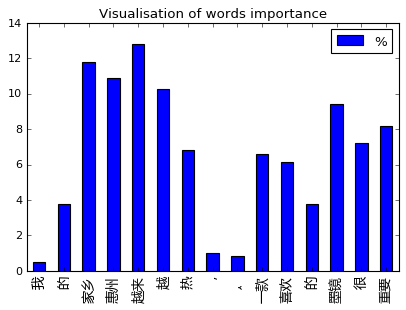

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.69471502]


array([ 0.69471502], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.59093189]


array([ 0.59093189], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.59093189]


array([ 0.59093189], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 套票:0.587655 1900:0.504324 单程:0.486742 旧金山:0.429504 机票:0.422400 拱:0.410312 旅游:0.408634 清迈:0.405624 护照:0.400200 旅行:0.398782 5288:0.392312 曼谷:0.391864 488:0.389008 1080:0.380606 国航:0.378563 出发:0.374850 出团:0.369196 双十:0.362935 新山:0.361727 飞:0.357590 160:0.354445 5999:0.354149 南湖:0.353384 游:0.352003 古镇:0.347260 中青旅:0.347139 想飞:0.346763 海岛:0.346664 华盛顿:0.343396 迪斯尼:0.341955 双城:0.341655 芭提雅:0.341458 加州:0.336531 签证:0.334472 洋服:0.334254 越南:0.332791 设有:0.331164 直飞:0.330528 行程:0.329648 澳门:0.329220 国旅:0.328902 咫尺:0.328410 爬坡:0.328153 新加坡:0.325210 航线:0.324866 洛杉矶:0.324806 直达:0.320571 甲米:0.318365 安提瓜:0.317642 东京:0.315931 hkd:0.313308 西藏:0.312330 遨游:0.311871 滦州:0.311598 景点:0.311272 泰国:0.310408 1999:0.309346 跳水:0.308377 专列:0.308362 美西:0.308222 错峰:0.307960 布吉:0.307132 邮轮:0.304924 出境:0.304834 穷游:0.304441 九寨沟:0.301809 亚太:0.300233 海景:0.299587 假期:0.298275 1350:0.295257 季节:0.294522 中顺:0.293942 津:0.293697 crs:0.292625 畅游:0.292334 酒屋:0.292253 c1:0.291995 留学:0.290714 几十:0.289924 2199:0.289680 加拿大:0

In [31]:
top_words('民宿')

民宿:1.000000 格雷斯:0.449013 收买:0.431204 公寓:0.426676 旅馆:0.422987 平谷:0.417882 订房:0.389036 住:0.382062 尾盘:0.381311 滦州:0.379118 酒店:0.375238 梵高:0.372263 芭提雅:0.368765 5300:0.367309 府邸:0.363560 大鹏:0.361813 23000:0.359821 一隅:0.358251 芳香:0.355120 客栈:0.350581 107:0.347906 开往:0.342496 御园:0.342466 连绵:0.342194 375:0.341422 小城:0.340534 8100:0.336455 loft:0.332032 古城:0.331975 日本:0.331095 房:0.329289 银滩:0.328965 优游:0.328742 帕克:0.327667 路途:0.326551 歇:0.326180 置业:0.325971 金翔:0.324615 airbnb:0.324436 格拉斯哥:0.323402 万汇:0.323105 旅行:0.320100 湿地:0.319584 暖冬:0.319464 装好:0.319354 白鹭:0.319160 187:0.318733 一坐:0.318723 住宿:0.316711 间:0.316579 龙脉:0.316001 租房:0.315262 137:0.314840 效劳:0.314834 遨游:0.314668 马来西亚:0.314048 边陲:0.313014 滨江:0.312134 辛巴达:0.312011 公园:0.311856 讨论:0.311521 查找:0.311217 旅游:0.310842 蜜柚:0.310332 113:0.310307 古镇:0.310077 南湖:0.310025 泳池:0.309699 游神:0.309060 分隔:0.308800 国旅:0.308611 正序:0.308507 马坊:0.308481 两居:0.306991 房子:0.306324 22000:0.305827 主城:0.304900 精装:0.303048 ﹐:0.302149 装出:0.301602 穿梭:0.300774 景色:0.

In [32]:
top_words('酒店')

酒店:1.000000 布草:0.465220 同里:0.443081 住宿:0.430661 宾馆:0.408020 公寓:0.388836 民宿:0.375237 携程:0.374683 平谷:0.370555 马代:0.363544 情侣:0.361020 1700:0.360958 糊涂:0.359614 订房:0.359298 度假:0.357983 格雷斯:0.356791 会所:0.350980 房:0.348996 阳春:0.346745 喜来登:0.344955 芭提雅:0.343953 浪漫:0.339220 婚宴:0.337120 布置:0.336679 旅馆:0.328508 置业:0.327320 水疗:0.327246 金翔:0.326131 七彩堂:0.324386 策划:0.324374 展会:0.323514 科勒:0.323336 汾阳:0.322670 开张:0.321579 晚会:0.320387 蓝调:0.320231 一坐:0.319656 样板:0.319208 三大:0.318588 候鸟:0.318469 吉隆坡:0.318345 舒舒:0.315896 间:0.315717 住:0.315321 湖景:0.314771 红专:0.313167 雅诗阁:0.312787 白鹭:0.311009 租借:0.310772 公园:0.309722 内环:0.309569 要素:0.309151 景色:0.307973 芽庄:0.307407 计价:0.307324 喜悦:0.306658 院:0.306650 府邸:0.306515 古兰:0.306255 主题:0.306188 影吧:0.305872 两厅:0.305781 赏花:0.304966 逛街:0.304047 尾盘:0.303836 恺:0.303193 107:0.302592 桑拿:0.302283 客房:0.301837 小城:0.301717 游艇:0.301058 美成:0.300743 8对1:0.300573 订婚:0.300327 天赐:0.300078 夏威夷:0.299555 普罗旺斯:0.298212 勘查:0.298069 婚庆:0.297771 花园:0.297666 名品:0.297445 情境:0.297438 亨通:0.297

In [33]:
top_words('旧金山')

旧金山:1.000000 情迷:0.564192 加州:0.562183 峡谷:0.495627 华盛顿:0.455733 美西:0.443211 往返:0.429504 古镇:0.428062 景点:0.422065 旅游:0.421185 滦州:0.416588 曼谷:0.409701 出团:0.401589 迪斯尼:0.399225 单程:0.398996 新山:0.395326 九寨沟:0.394368 蜜柚:0.392847 景美:0.391431 新加坡:0.391304 专列:0.391116 洛杉矶:0.390994 马坊:0.389912 绿地:0.386773 1900:0.385461 旅行:0.384170 穷游:0.381399 公园:0.379967 泳池:0.379849 套票:0.373683 488:0.373533 湿地:0.371034 甲米:0.369816 龙脉:0.369141 乡村:0.365476 同程:0.365026 机票:0.363371 niton:0.362776 咫尺:0.362770 海景:0.362724 游:0.360775 浮潜:0.359033 中青旅:0.358875 布吉:0.358773 小人儿:0.358484 国旅:0.358169 优游:0.356252 温泉:0.355185 假期:0.354968 温水:0.353515 邻近:0.353395 拱:0.352626 暑期:0.352318 南湖:0.352283 五国:0.351201 古城:0.349885 芬兰:0.348074 播撒:0.347820 神舟:0.347580 嘉汇:0.347025 度假:0.346445 妞:0.346155 service:0.346108 文教:0.344696 天游:0.344027 尼采:0.343689 酒屋:0.343242 马代:0.340969 187:0.340957 南沙:0.340889 附件:0.340040 花园:0.339196 lan:0.339045 泰国:0.337546 4a:0.336028 7800:0.335029 涠:0.334627 国航:0.333763 白鸽:0.332612 770:0.332026 主将:0.331965 挪威:0.331

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

越来:0.406535 家乡:0.373743 惠州:0.344872 越:0.325804 墨镜:0.299879 重要:0.259738 荼明:0.250288 导电:0.244404 越理:0.244183 扎堆:0.230643 脸部:0.230137 过敏:0.229055 很:0.228684 当当:0.225594 等等:0.222948 赛思特:0.221315 想说:0.220386 睛彩:0.219719 扩:0.219276 热:0.217294 多半:0.215107 散发:0.213428 惹:0.212503 呀:0.211501 oem:0.211127 一款:0.210337 燕窝:0.209835 感光:0.209794 前送:0.209616 祸:0.207993 利特:0.205234 耳钉:0.204356 越多:0.202161 来达:0.201671 达克罗:0.201500 筹划:0.200876 色斑:0.200796 晒斑:0.200618 会社:0.200338 食欲:0.200061 众联:0.199359 歌:0.199355 美甲:0.198068 回事:0.197567 o:0.196855 摇:0.196815 2aa:0.196728 pelec:0.196119 喜欢:0.195865 加力:0.195625 烧制:0.195519 120:0.194543 snow:0.194212 mage:0.193311 色素:0.192601 联创:0.191777 模思:0.191230 古风:0.190969 环亚:0.190299 年头:0.190205 氰:0.190051 克罗:0.189942 补水:0.189838 湖山:0.189472 防污:0.189433 受热:0.189053 薪金:0.188399 稀少:0.188295 ep:0.187986 上去:0.187140 胀:0.186951 甩手:0.186840 脸蛋:0.186128 眠:0.185023 整容:0.184867 和兴:0.184820 世家:0.184062 times:0.183956 橡:0.183882 130:0.183805 芭:0.183463 洗牌:0.183090 分散:0.183076 种猪:

In [35]:
top_words('眼镜')

眼镜:1.000000 出汗:0.532572 防滑:0.500970 滑落:0.444240 配:0.414394 镜片:0.401986 狂甩:0.384678 滑:0.380055 配戴:0.364780 配镜:0.358840 打球:0.351792 loho:0.350151 框:0.349599 依视路:0.346215 华德:0.345702 作用:0.345190 极轻:0.343916 吸油:0.341170 蓝牙:0.335741 耳机:0.332872 平果:0.327420 节食:0.325614 划痕:0.320132 工字钢:0.318703 镜架:0.312332 流汗:0.310921 纸:0.307431 239:0.307345 金奥:0.306422 出卖:0.305611 咬合:0.304928 硅胶:0.304316 登山:0.302987 视界:0.301038 听歌:0.299202 牙签:0.299185 翰宇:0.298871 转给:0.298379 入耳:0.297455 轻:0.296875 磨损:0.296187 妹:0.296134 多美:0.295814 木纹:0.295782 跑步:0.294925 内裤:0.294644 钥匙:0.293043 滑板:0.292480 尼龙:0.292131 透气:0.291992 网膜:0.291662 胸:0.289336 线控:0.287463 薄:0.287448 布基:0.287436 至高:0.287234 l:0.286542 摘掉:0.284894 兜里:0.284264 毫安:0.283851 3mm:0.283421 鲱:0.280074 热熔:0.279728 吃力:0.279423 大号:0.279372 龍:0.279320 机身:0.279247 颈:0.277820 中凯:0.277727 烦人:0.277292 不勒:0.276938 关闭:0.275537 exe:0.275162 拷:0.274942 板材:0.274238 上镜:0.273915 复合:0.273654 变色:0.273621 卡龙:0.273476 奈特:0.272725 蜂窝:0.272725 验光:0.272345 期期:0.271827 滴血:0.27168

In [36]:
top_words('nike')

nike:1.000000 耐克:0.535345 富润:0.398312 com:0.395610 徕卡:0.358513 air:0.353429 振雄:0.351757 aj:0.348927 洗护:0.346391 正品:0.346280 相机:0.331291 机芯:0.330255 三叶:0.324068 ree:0.322966 惠普:0.322720 汽配:0.320406 三双:0.318213 wms:0.318192 benro:0.315905 全线:0.314342 bonz:0.312470 新上市:0.310631 气垫:0.310597 惠达:0.309844 1309:0.309480 春夏:0.308790 一千多:0.308116 傲世:0.306897 车标:0.306406 渐变:0.306258 藝:0.304170 里程:0.303854 gia:0.303386 米诺:0.303212 gox:0.303201 红人:0.302601 专卖:0.302283 mcc:0.301665 买比:0.301189 gl:0.300027 立森:0.300007 daniel:0.299419 导航:0.299124 中车:0.298898 蓝牙:0.297695 耳机:0.297653 刮刮:0.297228 aimi:0.296772 百诺:0.295239 像样:0.295190 迅:0.293654 远投:0.293644 户外:0.293341 步频:0.293288 v:0.292568 铁路:0.291651 倩:0.290951 轿:0.290401 音质:0.289767 专柜:0.289306 手表:0.289272 捷宝:0.287463 車:0.287183 www:0.286790 发亮:0.286705 首汽:0.286657 vigor:0.286501 tfo:0.286120 跑步:0.285259 军用:0.284424 熠:0.284362 洗漱:0.284188 zenlayer:0.283545 可视:0.283175 营收:0.282911 捷:0.282388 jp762a:0.281912 亚欧:0.281282 club:0.281272 达令:0.280992 箱柜:0.28

In [37]:
top_words('耐克')

耐克:1.000000 nike:0.535345 名表:0.440920 阿迪:0.403540 三双:0.396044 名牌:0.349737 专柜:0.346819 宁花:0.344491 音质:0.334056 盲目:0.331717 高傲:0.328572 正品:0.322827 外星:0.322272 但:0.317306 nas:0.316767 鞋:0.314865 亚欧:0.314556 送友:0.311982 大厦:0.308566 金面:0.306770 上次:0.306136 这块:0.305137 表:0.303992 惠达:0.303442 高贵:0.303106 忍痛:0.301575 送亲:0.300657 296:0.299168 逛:0.298337 da:0.298093 一万:0.296111 邓禄普:0.295954 同庆:0.295262 氙:0.294530 分量:0.294491 15mm:0.294325 饭桌:0.292182 频:0.292149 地摊:0.291588 lkk:0.291007 对讲:0.287471 刊登:0.287197 疾:0.286711 箱柜:0.285558 百多:0.285299 usb:0.285150 姻:0.284936 机车:0.284357 手表:0.284146 弈:0.283237 洗护:0.282980 债:0.282618 闪闪:0.282601 腕表:0.282583 抢到:0.282454 机芯:0.281760 双:0.281582 网罗:0.280708 金杯:0.280546 古香:0.280206 千多:0.277578 存款:0.277493 车库:0.276833 买到:0.276487 其实:0.275585 药典:0.275474 只用:0.275324 唯一:0.275238 长江:0.275130 富润:0.275118 同声:0.274971 耳机:0.274926 油价:0.274434 网页:0.274379 三百多:0.274005 奖杯:0.273816 169:0.271344 赛金:0.271064 惠普:0.270180 奢侈:0.270118 蓝牙:0.269902 汽配:0.269851 梯田:0.269247 阅:0.

In [38]:
top_words('沧州')

沧州:1.000000 周口:0.459127 河源:0.452335 嘉兴:0.443614 呼和浩特:0.430655 赣州:0.425677 济南:0.421852 兴安:0.419456 台州:0.418803 海口:0.415662 汕尾:0.413162 泸州:0.412991 内江:0.411816 十堰:0.393243 菏泽:0.393097 信阳:0.388211 盐城:0.387951 德阳:0.384812 桩基:0.384799 南阳:0.384736 本溪:0.382122 衢州:0.381402 保定:0.377285 潍坊:0.372205 福州:0.369158 文山:0.369092 重庆:0.365222 阜新:0.363666 黔:0.362351 抚顺:0.360180 宝鸡:0.357883 延边:0.357364 铁岭:0.357174 南昌:0.354089 自贡:0.352162 泰州:0.351939 青岛:0.351875 鑫宜达:0.350656 南充:0.348799 温州:0.348590 无锡:0.347628 南京:0.346534 舟山:0.344416 乌鲁木齐:0.340037 滨州:0.338649 佛山:0.338177 廊坊:0.337944 哈尔滨:0.334734 贺州:0.333581 西宁:0.331628 眉山:0.329837 南宁:0.328531 东莞:0.328426 镇江:0.323350 东南:0.320591 聊城:0.319718 仙桃:0.318565 开封:0.314921 珠海:0.313239 郑州:0.310795 濮阳:0.308483 抚州:0.302415 包头:0.302245 商丘:0.300954 湛江:0.299372 欧佩克:0.299306 大连:0.298615 昆明:0.298105 邯郸:0.297813 钢衬:0.297345 宁波:0.295430 锦州:0.294210 绵阳:0.294125 鞍山:0.293208 济宁:0.287963 遂宁:0.287718 许昌:0.285976 邢台:0.284973 张家界:0.284589 金元:0.284393 大庆:0.282948 广州:0.282791 莆田:0.2822

In [39]:
top_words('电视')

电视:1.000000 彩电:0.488913 液晶:0.475278 盒子:0.433445 广播:0.404742 kuset:0.404219 did:0.357953 屏:0.353708 天线:0.347670 机顶:0.343602 斯斐德:0.340986 显示:0.336436 两用:0.332931 赛鸽:0.318880 步频:0.317658 剧:0.312506 phone:0.311680 拆机:0.311545 电影:0.309915 华邦:0.309565 lkk:0.308918 6gb:0.307027 冰箱:0.305807 闪光:0.305123 寰:0.303596 hdid:0.302573 年会:0.301208 幕布:0.301085 拼接:0.299761 荧:0.298338 韵意:0.297288 坐:0.296801 凯帕斯:0.295793 亚美:0.294837 投影:0.293609 广告:0.292891 tvc:0.292308 影视:0.291897 维修:0.291813 灯箱:0.291479 媒体:0.284214 if:0.280294 ued:0.280213 灏:0.279361 开机:0.278819 飞飞:0.277494 悬:0.276329 视听:0.276321 视:0.276180 音乐:0.275666 4l:0.275602 菲尼特:0.275139 脚架:0.274551 杞:0.274523 清晰:0.271785 天笔:0.271648 旺龙:0.271136 禁忌:0.270138 好再来:0.269709 worth:0.269668 触摸:0.268673 鉴赏:0.268492 灶:0.268193 亨得利:0.267958 衢:0.267836 视频:0.267375 才艺:0.267373 旷世:0.266540 传媒:0.266053 网点:0.265362 策划:0.265345 驿站:0.264642 加人:0.264582 熟食:0.264090 普天:0.262954 浩宇:0.262302 喷泉:0.262292 抢答:0.262288 @:0.262093 超薄:0.261961 签到:0.261471 制作:0.261217 施:0.260

In [40]:
top_words('帅哥')

帅哥:1.000000 黄皮:0.360151 一边:0.349027 单身:0.342704 网吧:0.331471 瞎眼:0.325121 新思路:0.323270 打磨:0.322482 哇:0.312475 聊天:0.309497 斯斐德:0.308166 18k:0.303559 当年:0.303548 合体:0.303505 证卡:0.300874 仙:0.295516 大龄:0.295456 合集:0.293477 空姐:0.292626 痘痘:0.291986 美女:0.291395 妹:0.290950 睡着:0.290066 谋士:0.286383 唇妆:0.285422 镶:0.285331 精雕:0.285204 绑:0.282847 好闻:0.279728 小心:0.279232 咬:0.278847 全保:0.277833 包夜:0.276441 甚:0.276095 笈:0.274504 麻:0.273926 小说:0.271730 骨骼:0.271485 地网:0.271426 唇膏:0.271174 念念:0.271163 男:0.269948 颜:0.269821 妹子:0.269105 未有:0.268273 白熊:0.267189 呵呵:0.266560 结识:0.266144 躁动:0.265771 水嫩:0.265026 挎:0.264917 腊:0.264706 马路:0.264620 对待:0.264216 嗖:0.263661 既然:0.262926 火花:0.262690 气缸:0.261772 弯曲:0.261505 孙子:0.261170 三味:0.260831 主播:0.260313 big:0.259957 女神:0.259475 内向:0.259279 看花:0.259003 tantan:0.258837 解题:0.258755 英美:0.258743 韧性:0.258618 恶魔:0.258494 名表:0.258407 寻梦:0.257988 烦人:0.257680 见底:0.257532 诗:0.257016 high:0.256857 斩首:0.256589 血饮:0.256522 而又:0.256228 闯过:0.255984 牙套:0.255964 细算:0.255931 颊:0.25528

In [41]:
top_words('500块在这APP能买三双nike！还包邮！老婆夸我会省钱！')

三双:0.583717 邮:0.439111 包:0.399111 百多:0.369345 高傲:0.366711 夸:0.366707 三百多:0.360958 169:0.356655 鞋都:0.350571 aj:0.350443 耐克:0.342871 开春:0.333877 脱皮:0.333080 专柜:0.323018 nike:0.321264 阿迪:0.320307 耐穿:0.313056 原单:0.311767 鞋:0.310571 得体:0.306975 上身:0.305706 国庆:0.300744 松软:0.299049 亲眼:0.298867 bllp:0.293913 198:0.291548 次货:0.288370 app:0.287209 买:0.286307 走时:0.285176 已售:0.284324 cucci:0.279723 囤货:0.277790 达令:0.277433 yy:0.275740 她说:0.274322 一会:0.272260 轨迹:0.270225 双:0.270014 一两百:0.269979 大牌:0.268427 多几:0.267778 巡山:0.266870 小气:0.265339 变型:0.265244 一千多:0.263768 送友:0.262126 这时候:0.261857 花洒:0.260325 奢侈:0.260091 金面:0.259174 ugg:0.258494 真皮:0.258158 皮衣:0.257816 邓禄普:0.256811 名表:0.256453 格子:0.253539 毛皮:0.253180 减钜:0.252617 起皱:0.251719 像样:0.248251 坦白:0.247334 粉底:0.246928 冰刀:0.246298 绒裤:0.245933 网购:0.245933 送亲:0.245046 手表:0.243663 皮靴:0.243596 正品:0.243435 好闻:0.242707 脚下:0.242527 流露:0.242405 抢到:0.241560 脚臭:0.241122 轻盈:0.240620 狗粮:0.240264 地摊:0.240169 高跟:0.239639 午间:0.239538 春夏:0.238985 驾车:0.238884 便宜:0.2

In [42]:
top_words('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

三双:0.583717 邮:0.439111 包:0.399111 百多:0.369345 高傲:0.366711 夸:0.366707 三百多:0.360958 169:0.356655 鞋都:0.350571 aj:0.350443 耐克:0.342871 开春:0.333877 脱皮:0.333080 专柜:0.323018 nike:0.321264 阿迪:0.320307 耐穿:0.313056 原单:0.311767 鞋:0.310571 得体:0.306975 上身:0.305706 国庆:0.300744 松软:0.299049 亲眼:0.298867 bllp:0.293913 198:0.291548 次货:0.288370 app:0.287209 买:0.286307 走时:0.285176 已售:0.284324 cucci:0.279723 囤货:0.277790 达令:0.277433 yy:0.275740 她说:0.274322 一会:0.272260 轨迹:0.270225 双:0.270014 一两百:0.269979 大牌:0.268427 多几:0.267778 巡山:0.266870 小气:0.265339 变型:0.265244 一千多:0.263768 送友:0.262126 这时候:0.261857 花洒:0.260325 奢侈:0.260091 金面:0.259174 ugg:0.258494 真皮:0.258158 皮衣:0.257816 邓禄普:0.256811 名表:0.256453 格子:0.253539 毛皮:0.253180 减钜:0.252617 起皱:0.251719 像样:0.248251 坦白:0.247334 粉底:0.246928 冰刀:0.246298 绒裤:0.245933 网购:0.245933 送亲:0.245046 手表:0.243663 皮靴:0.243596 正品:0.243435 好闻:0.242707 脚下:0.242527 流露:0.242405 抢到:0.241560 脚臭:0.241122 轻盈:0.240620 狗粮:0.240264 地摊:0.240169 高跟:0.239639 午间:0.239538 春夏:0.238985 驾车:0.238884 便宜:0.2

argmax_encode [[ 0.16212285  0.21925783  0.11979158  0.05574199  0.28720862  0.07800899
   0.2863065   0.58371699  0.32126445  0.09757951  0.12247231  0.39911145
   0.43911129  0.09757951  0.14063682  0.36670709 -0.01700101  0.16206487
   0.10408846  0.09757951  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 9489, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.16212285, 0.21925783, 0.11979158, 0.055741988, 0.28720862, 0.078008994, 0.2863065, 0.58371699, 0.32126445, 0.097579509, 0.12247231, 0.39911145, 0.43911129, 0.097579509, 0.14063682, 0.36670709, 0, 0.162064

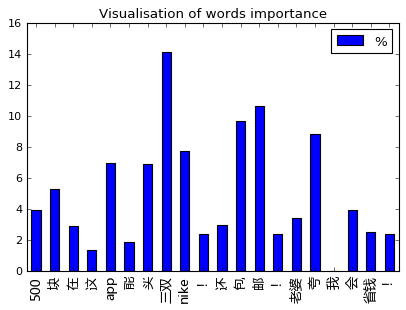

In [43]:
predict('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

argmax_encode [[ 0.1916891   0.23985296  0.13727081  0.04895398  0.29439914  0.07464577
   0.28883922  0.59632385  0.42611656  0.11604337  0.1356481   0.38925207
   0.44199279  0.11604337  0.15080142  0.38079318 -0.03088454  0.17604345
   0.09703954  0.11604337  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 8221, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.1916891, 0.23985296, 0.13727081, 0.04895398, 0.29439914, 0.074645773, 0.28883922, 0.59632385, 0.42611656, 0.11604337, 0.1356481, 0.38925207, 0.44199279, 0.11604337, 0.15080142, 0.38079318, 0, 0.17604345, 

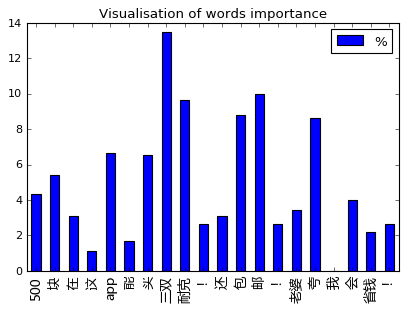

In [44]:
predict('500块在这APP能买三双耐克！还包邮！老婆夸我会省钱！')